In [2]:
# The code was removed by Watson Studio for sharing.

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"


In [5]:
pd.set_option('display.max_columns', None)


In [6]:
df.dtypes


INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [7]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format='%Y-%m-%d %H:%M:%S')


In [8]:
gr_count = df.groupby(['OFFENSE_DESCRIPTION'], as_index=['OFFENSE_DESCRIPTION']).count().ix[:, 1]
gr_count

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


OFFENSE_DESCRIPTION
A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.                          1
A&B ON POLICE OFFICER                                                 7
ABDUCTION - INTICING                                                 12
AFFRAY                                                              306
AIRCRAFT INCIDENTS                                                   65
ANIMAL ABUSE                                                         86
ANIMAL CONTROL - DOG BITES - ETC.                                   493
ANIMAL INCIDENTS                                                    388
ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)                          13
ANNOYING AND ACCOSTIN                                                 3
ANNOYING AND ACCOSTING                                              144
ARSON                                                               111
ASSAULT & BATTERY                                                    17
ASSAULT & BATTERY D/W - KNIFE               

In [9]:
crimes = gr_count.index
crimes

Index(['A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.', 'A&B ON POLICE OFFICER',
       'ABDUCTION - INTICING', 'AFFRAY', 'AIRCRAFT INCIDENTS', 'ANIMAL ABUSE',
       'ANIMAL CONTROL - DOG BITES - ETC.', 'ANIMAL INCIDENTS',
       'ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)', 'ANNOYING AND ACCOSTIN',
       ...
       'VIOLATION - RESTRAINING ORDER (NO ARREST)', 'WARRANT ARREST',
       'WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT',
       'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - FIREARM - OTHER VIOLATION',
       'WEAPON - FIREARM - SALE / TRAFFICKING',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - OTHER VIOLATION',
       'WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER'],
      dtype='object', name='OFFENSE_DESCRIPTION', length=281)

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


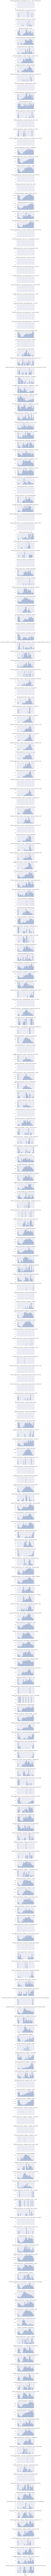

In [10]:
g = sns.FacetGrid(df, 
                  row="OFFENSE_DESCRIPTION", 
                  row_order=crimes,
                  size=1.9, aspect=4, 
                  sharex=True,
                  sharey=False)

g.map(sns.distplot, "HOUR", bins=24, kde=False, rug=False)

In [11]:
gr_count1 = gr_count.reset_index().sort_values(by='OFFENSE_CODE',ascending=False).head(15)
gr_count1

,OFFENSE_DESCRIPTION,OFFENSE_CODE
246,SICK/INJURED/MEDICAL - PERSON,26790
135,INVESTIGATE PERSON,25665
172,M/V - LEAVING SCENE - PROPERTY DAMAGE,22296
262,VANDALISM,20186
21,ASSAULT SIMPLE - BATTERY,19888
263,VERBAL DISPUTE,18721
136,INVESTIGATE PROPERTY,15606
253,TOWED MOTOR VEHICLE,15321
252,THREATS TO DO BODILY HARM,12515
206,PROPERTY - LOST,12234


In [14]:
pd.DataFrame(gr_count1)
crimes1 = gr_count1['OFFENSE_DESCRIPTION']
crimes1

246            SICK/INJURED/MEDICAL - PERSON
135                       INVESTIGATE PERSON
172    M/V - LEAVING SCENE - PROPERTY DAMAGE
262                                VANDALISM
21                  ASSAULT SIMPLE - BATTERY
263                           VERBAL DISPUTE
136                     INVESTIGATE PROPERTY
253                      TOWED MOTOR VEHICLE
252                THREATS TO DO BODILY HARM
206                          PROPERTY - LOST
162              LARCENY THEFT FROM BUILDING
164    LARCENY THEFT FROM MV - NON-ACCESSORY
272                           WARRANT ARREST
158                      LARCENY SHOPLIFTING
181           M/V ACCIDENT - PROPERTY DAMAGE
Name: OFFENSE_DESCRIPTION, dtype: object

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


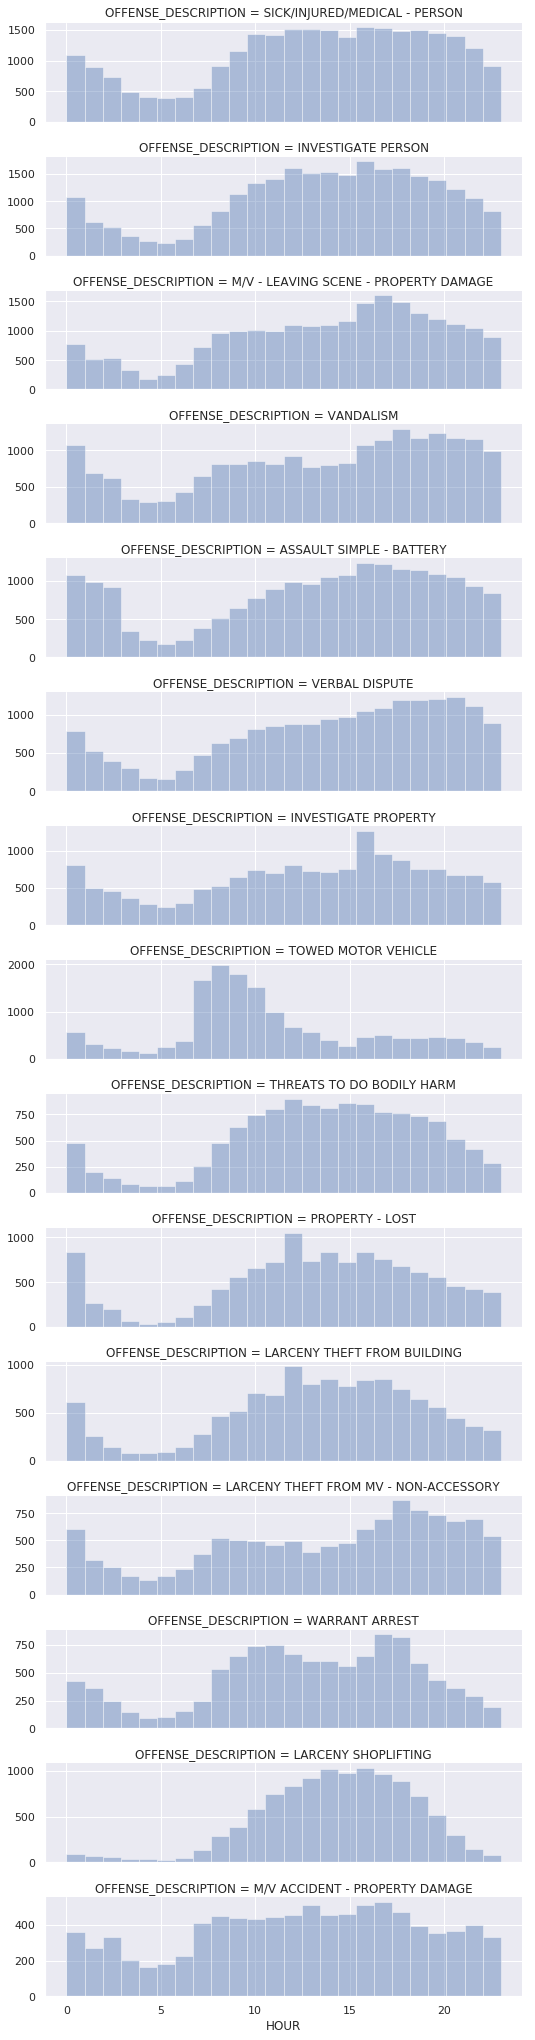

In [15]:
g = sns.FacetGrid(df, 
                  row="OFFENSE_DESCRIPTION", 
                  row_order=crimes1,
                  size=1.9, aspect=4, 
                  sharex=True,
                  sharey=False)

g.map(sns.distplot, "HOUR", bins=24, kde=False, rug=False)

In [11]:
crimes_time_series = df.groupby(['OFFENSE_DESCRIPTION', 'OCCURRED_ON_DATE'], as_index=['OFFENSE_DESCRIPTION', 'OCCURRED_ON_DATE']).count().ix[:,1].unstack(level=0).unstack(level=0).fillna(0)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


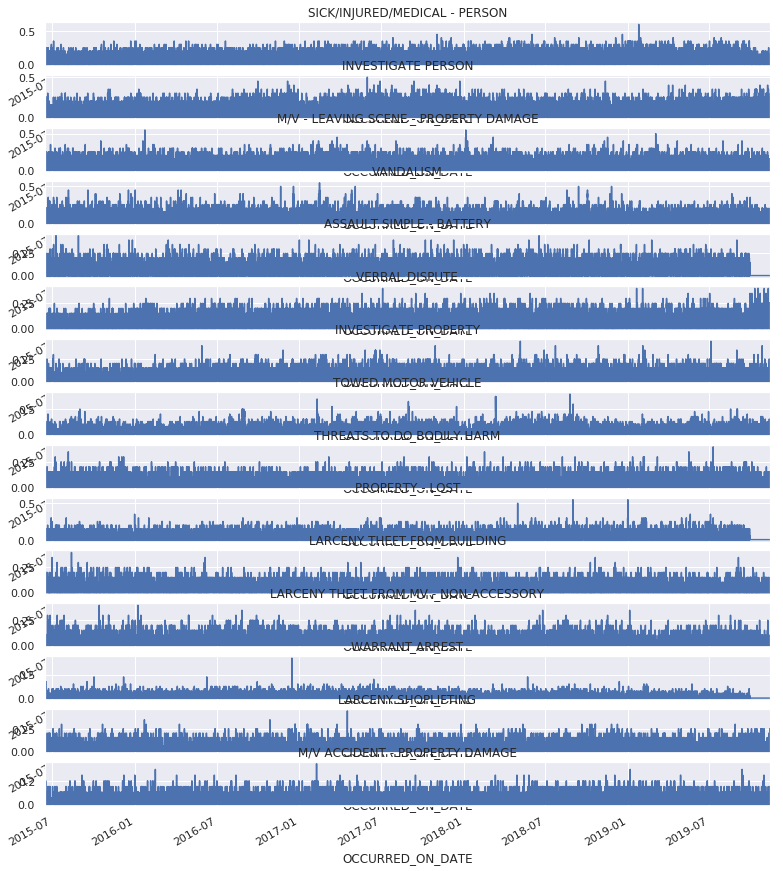

In [17]:
for i, col in zip(range(1, len(crimes) + 1), crimes1):
    plt.subplot(len(crimes1), 1, i)
    plt.title(col)
    crimes_time_series[col].rolling(window=20, min_periods=20).mean().plot()

In [ ]:
correlation_matrix = crimes_time_series.unstack(0)[crimes1].corr()
sns.heatmap(correlation_matrix,cmap="Blues")

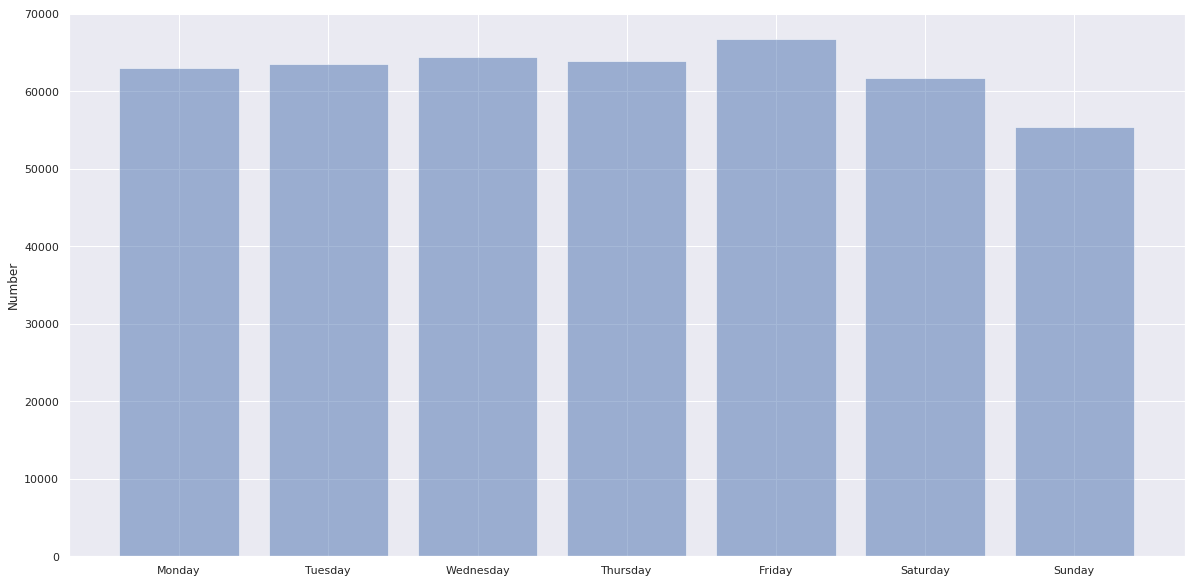

In [3]:
# bar_code
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 

#5.4. Total number crime for each day of week

def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

list_unique_day, list_number_day = create_list_number_crime('DAY_OF_WEEK',day_of_week)

#pie_plot(list_unique_day,list_number_day)

bar_chart(list_number_day,list_unique_day)

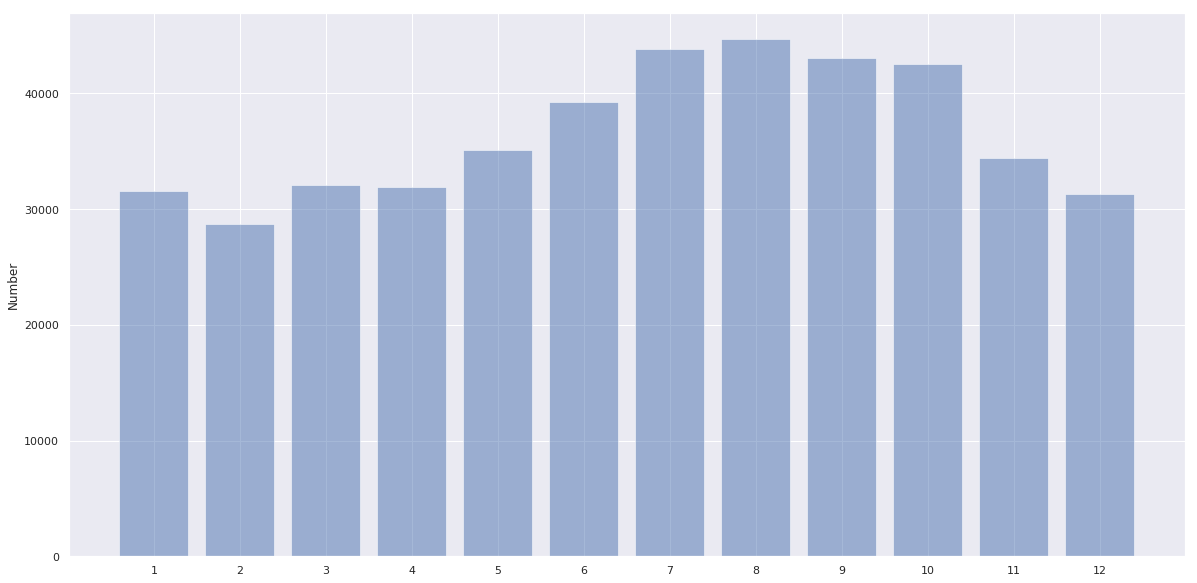

In [8]:
df['Month']=pd.DatetimeIndex(df['OCCURRED_ON_DATE']).month
list_unique_month, list_number_month = create_list_number_crime('MONTH',list(range(1,13)))
bar_chart(list_number_month,list_unique_month)

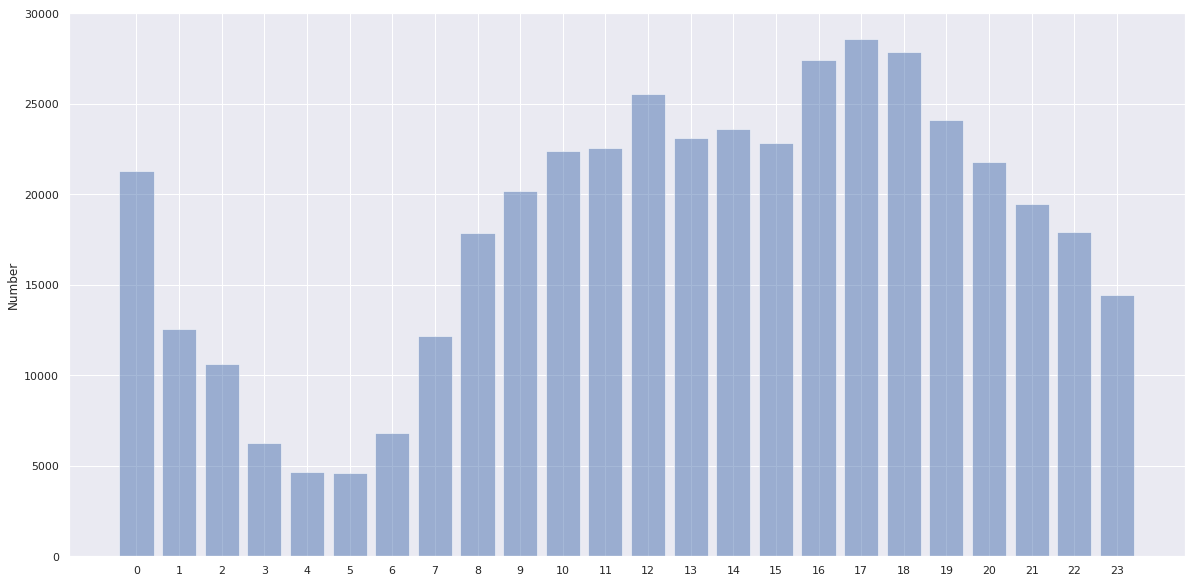

In [9]:
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))
bar_chart(list_number_hour,list_unique_hour)

In [6]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')